In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


In [4]:
from utils.util_funcs import build_columns_for_df, read_from_csv, save_to_csv

assets = ["PG", "^GSPC"]
pf_data = pd.DataFrame()

for a in assets:
    df_data = yf.download(a, start="2010-1-1")
    columns = build_columns_for_df(df_data)
    save_to_csv(df=df_data,ticker_name=a)
    pf_data[a] = read_from_csv(a, column_names=columns)["Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
pf_data.tail()

,PG,^GSPC
Date,,
2025-03-31,170.419998,5611.850098
2025-04-01,170.559998,5633.069824
2025-04-02,169.500000,5670.970215
2025-04-03,172.389999,5396.520020
2025-04-04,163.750000,5074.080078


<Axes: xlabel='Date'>

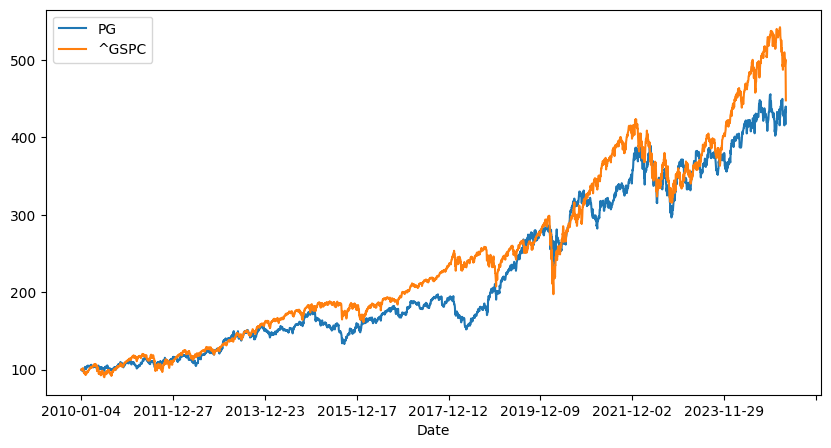

In [6]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10,5))

In [7]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [8]:
log_returns.mean() * 250

PG       0.093161
^GSPC    0.097686
dtype: float64

In [9]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.029345,0.015614
^GSPC,0.015614,0.029980


In [10]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.526433
^GSPC,0.526433,1.000000


In [11]:
num_assets = len(assets)

In [12]:
num_assets

2

In [13]:
arr = np.random.random(2)
arr

array([0.29715618, 0.4279207 ])

In [14]:
arr[0] + arr[1]

np.float64(0.7250768804413122)

In the second line the formula is w = w / sum(w).

Don't forget in this case w is array of 2

(w1 / w1 + w2) + (w2 / w1 + w2) = w1 + w2 / w1 + w2 = 1.0

In [15]:
weights =np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.84560551, 0.15439449])

In [16]:
weights[0] + weights[1]

np.float64(1.0)

Expected portfolio Return:

In [17]:
np.sum(weights * log_returns.mean()) * 250

np.float64(0.09386002361809476)

Expected portfolio variance:

In [18]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

np.float64(0.025774584889214122)

Expected portfolio volatility:

In [19]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

np.float64(0.16054465076487015)

In [21]:
portfolio_returns = []
portfolio_volatilities = []

for x in range(1000):
    weights =np.random.random(num_assets)
    weights /= np.sum(weights)
    portfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

portfolio_returns, portfolio_volatilities

([np.float64(0.09687362433319627),
  np.float64(0.09327315472421024),
  np.float64(0.09699441586475153),
  np.float64(0.09669467960877273),
  np.float64(0.09527663800877018),
  np.float64(0.09607655775074142),
  np.float64(0.09640059693227197),
  np.float64(0.09319371230550098),
  np.float64(0.09589316603867477),
  np.float64(0.09566958645731896),
  np.float64(0.0960229625778662),
  np.float64(0.09577099936365221),
  np.float64(0.09721529009188692),
  np.float64(0.09339375509780558),
  np.float64(0.09570300466125951),
  np.float64(0.09546696735232438),
  np.float64(0.09674465656759224),
  np.float64(0.09637999058549415),
  np.float64(0.09641692383380594),
  np.float64(0.09707274452098032),
  np.float64(0.09755207191864392),
  np.float64(0.09554524165975803),
  np.float64(0.0939789909920238),
  np.float64(0.09532011803848142),
  np.float64(0.09647566317824417),
  np.float64(0.09498553832973934),
  np.float64(0.09601860717385878),
  np.float64(0.0933358221894663),
  np.float64(0.09481391

Repeat gain using np.array to save the data, to get efficient frontier

In [22]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights =np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.09383415, 0.09757324, 0.09601558, 0.09428024, 0.09527827,
        0.09665547, 0.09476171, 0.09570714, 0.09650278, 0.09608933,
        0.09519136, 0.09509309, 0.09527331, 0.09553968, 0.09577749,
        0.09679844, 0.09602872, 0.09678741, 0.09524927, 0.09606312,
        0.09372075, 0.09466089, 0.09643987, 0.0940196 , 0.09600608,
        0.09453483, 0.09412795, 0.0958701 , 0.09559138, 0.09565053,
        0.09400191, 0.09420289, 0.0949147 , 0.09383727, 0.0958914 ,
        0.09566499, 0.09570197, 0.09537489, 0.09564086, 0.09759423,
        0.09575931, 0.09466394, 0.09763974, 0.09605662, 0.09434466,
        0.09601105, 0.09763457, 0.09632352, 0.09488524, 0.09748755,
        0.09605757, 0.09628021, 0.09559807, 0.09491741, 0.09560807,
        0.09751845, 0.09723596, 0.09511625, 0.09557142, 0.09560312,
        0.09578587, 0.09540163, 0.09659065, 0.09565201, 0.09543345,
        0.09538459, 0.09676866, 0.09624859, 0.09551602, 0.09504128,
        0.09477647, 0.09723829, 0.0959384 , 0.09

In [23]:
portfolios = pd.DataFrame({"Return": pfolio_returns, "Volatility": pfolio_volatilities})

In [24]:
portfolios.head()

,Return,Volatility
0,0.093834,0.160882
1,0.097573,0.171117
2,0.096016,0.152322
3,0.094280,0.155796
4,0.095278,0.150488


In [25]:
portfolios.tail()

,Return,Volatility
995,0.095698,0.150929
996,0.096497,0.156106
997,0.094757,0.152166
998,0.095878,0.151607
999,0.094928,0.151346


Text(0, 0.5, 'Expected Return')

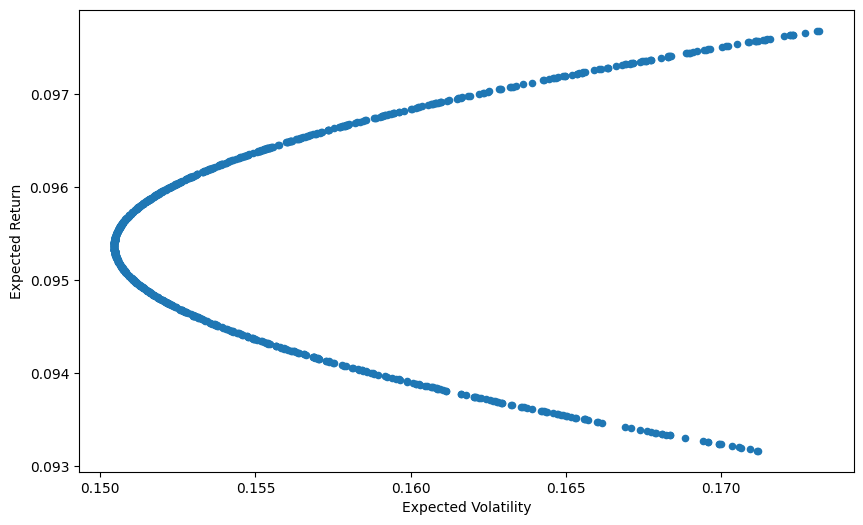

In [26]:
portfolios.plot(x="Volatility", y="Return", kind="scatter",figsize=(10,6))
plt.xlabel("Expected Volatility")
plt.ylabel("Expected Return")